In [1]:
import pandas as pd

In [2]:
def clean_netflix_data(df, dataset_name):
    df["date_added"] = pd.to_datetime(df["date_added"], errors='coerce')

    # Fill missing values
    df["country"] = df["country"].fillna("Unknown")
    df["rating"] = df["rating"].fillna("Unknown")
    df["cast"] = df["cast"].fillna("Not Specified")
    df["director"] = df["director"].fillna("Not Specified")

    # Drop NA rows for important columns
    df = df.dropna(subset=["date_added", "duration"])

    # Feature engineering
    df["duration_int"] = df["duration"].str.extract("(\d+)").astype(int)
    df["duration_unit"] = df["duration"].str.extract("([a-zA-Z ]+)", expand=False).str.strip()

    return df


In [3]:
file_path = "/content/netflix_titles_nov_2019.csv.zip"

datasets = {file_path: pd.read_csv(file_path)}

datasets_cleaned = {name: clean_netflix_data(df, name) for name, df in datasets.items()}


<ipython-input-2-8f3ae5c23377>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["duration_int"] = df["duration"].str.extract("(\d+)").astype(int)
<ipython-input-2-8f3ae5c23377>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["duration_unit"] = df["duration"].str.extract("([a-zA-Z ]+)", expand=False).str.strip()


In [4]:
df = datasets_cleaned[file_path]

df = df.dropna()
df = df.sort_values(by="date_added")

print(df.info())
print(df.describe())
df["added_dayofweek"] = df["date_added"].dt.dayofweek
df["title_length"] = df["title"].apply(lambda x: len(str(x)))

# Target column: example — next added title length (like predicting next close price)
df["Next_Title_Length"] = df["title_length"].shift(-1)

df = df.dropna()

df.head()


<class 'pandas.core.frame.DataFrame'>
Index: 5195 entries, 5836 to 0
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   show_id        5195 non-null   int64         
 1   title          5195 non-null   object        
 2   director       5195 non-null   object        
 3   cast           5195 non-null   object        
 4   country        5195 non-null   object        
 5   date_added     5195 non-null   datetime64[ns]
 6   release_year   5195 non-null   int64         
 7   rating         5195 non-null   object        
 8   duration       5195 non-null   object        
 9   listed_in      5195 non-null   object        
 10  description    5195 non-null   object        
 11  type           5195 non-null   object        
 12  duration_int   5195 non-null   int64         
 13  duration_unit  5195 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(10)
memory usage: 608.8+ KB
None
     

,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type,duration_int,duration_unit,added_dayofweek,title_length,Next_Title_Length
5836,70053412,To and From New York,Sorin Dan Mihalcescu,"Barbara King, Shaana Diya, John Krisiukenas, Y...",United States,2008-01-01,2006,NR,81 min,"Dramas, Independent Movies, Thrillers","While covering a story in New York City, a Sea...",Movie,81,min,1,20,15.0
5835,70157452,Dinner for Five,Not Specified,Not Specified,United States,2008-02-04,2007,TV-MA,1 Season,Stand-Up Comedy & Talk Shows,"In each episode, four celebrities join host Jo...",TV Show,1,Season,0,15,23.0
5834,70084180,Just Another Love Story,Ole Bornedal,"Anders W. Berthelsen, Rebecka Hemse, Nikolaj L...",Denmark,2009-05-05,2007,NR,104 min,"Dramas, International Movies",When he causes a car accident that leaves a yo...,Movie,104,min,1,23,8.0
5833,70127998,Splatter,Joe Dante,"Corey Feldman, Tony Todd, Tara Leigh, Erin Way...",United States,2009-11-18,2009,TV-14,29 min,Horror Movies,"After committing suicide, a washed-up rocker r...",Movie,29,min,2,8,27.0
5832,70141644,Mad Ron's Prevues from Hell,Jim Monaco,"Nick Pawlow, Jordu Schell, Jay Kushwara, Micha...",United States,2010-11-01,1987,NR,84 min,"Cult Movies, Horror Movies","This collection cherry-picks trailers, forgott...",Movie,84,min,0,27,13.0


In [5]:
df["added_dayofweek"] = df["date_added"].dt.dayofweek
df["title_length"] = df["title"].apply(lambda x: len(str(x)))

# Target column: example — next added title length (like predicting next close price)
df["Next_Title_Length"] = df["title_length"].shift(-1)

df = df.dropna()

df.head()


,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type,duration_int,duration_unit,added_dayofweek,title_length,Next_Title_Length
5836,70053412,To and From New York,Sorin Dan Mihalcescu,"Barbara King, Shaana Diya, John Krisiukenas, Y...",United States,2008-01-01,2006,NR,81 min,"Dramas, Independent Movies, Thrillers","While covering a story in New York City, a Sea...",Movie,81,min,1,20,15.0
5835,70157452,Dinner for Five,Not Specified,Not Specified,United States,2008-02-04,2007,TV-MA,1 Season,Stand-Up Comedy & Talk Shows,"In each episode, four celebrities join host Jo...",TV Show,1,Season,0,15,23.0
5834,70084180,Just Another Love Story,Ole Bornedal,"Anders W. Berthelsen, Rebecka Hemse, Nikolaj L...",Denmark,2009-05-05,2007,NR,104 min,"Dramas, International Movies",When he causes a car accident that leaves a yo...,Movie,104,min,1,23,8.0
5833,70127998,Splatter,Joe Dante,"Corey Feldman, Tony Todd, Tara Leigh, Erin Way...",United States,2009-11-18,2009,TV-14,29 min,Horror Movies,"After committing suicide, a washed-up rocker r...",Movie,29,min,2,8,27.0
5832,70141644,Mad Ron's Prevues from Hell,Jim Monaco,"Nick Pawlow, Jordu Schell, Jay Kushwara, Micha...",United States,2010-11-01,1987,NR,84 min,"Cult Movies, Horror Movies","This collection cherry-picks trailers, forgott...",Movie,84,min,0,27,13.0


Skewness of features:
show_id             -5.655018
release_year        -4.021966
duration_int        -0.388075
added_dayofweek     -0.225000
title_length         1.488078
Next_Title_Length    1.486987
dtype: float64


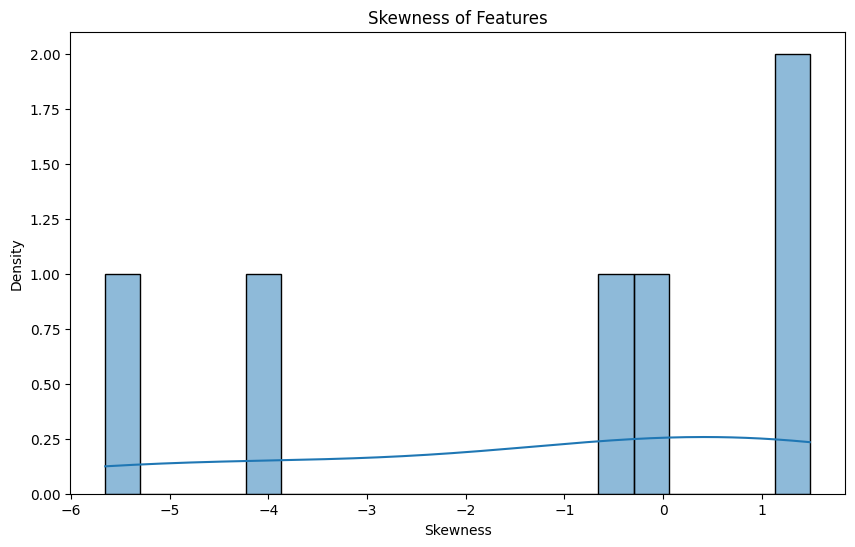

In [6]:
import pandas as pd


skewness = df.select_dtypes(include=['number']).skew()


print("Skewness of features:")
print(skewness)


import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(skewness, kde=True, bins=20)
plt.title("Skewness of Features")
plt.xlabel("Skewness")
plt.ylabel("Density")
plt.show()

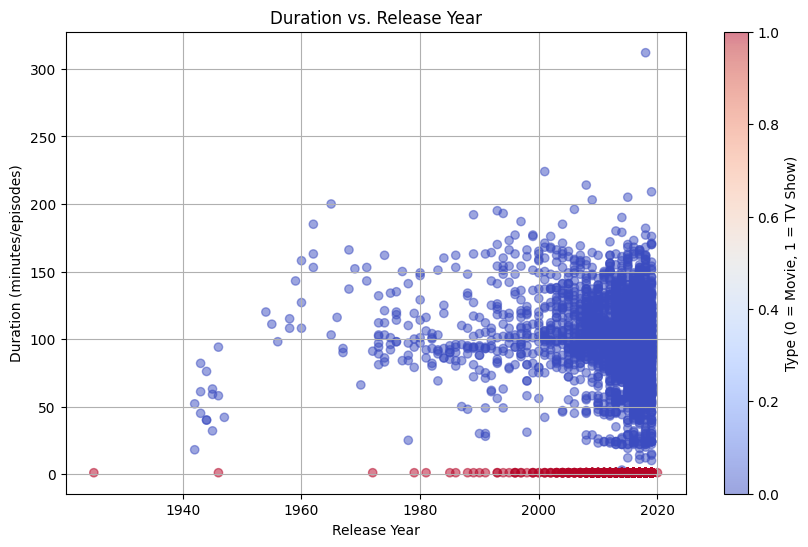

In [8]:
import matplotlib.pyplot as plt
if 'type_encoded' not in df.columns:
    df['type_encoded'] = df['type'].map({'Movie': 0, 'TV Show': 1})

plt.figure(figsize=(10, 6))
plt.scatter(df['release_year'], df['duration_int'], alpha=0.5, c=df['type_encoded'], cmap='coolwarm')
plt.title('Duration vs. Release Year')
plt.xlabel('Release Year')
plt.ylabel('Duration (minutes/episodes)')
plt.colorbar(label='Type (0 = Movie, 1 = TV Show)')
plt.grid(True)
plt.show()

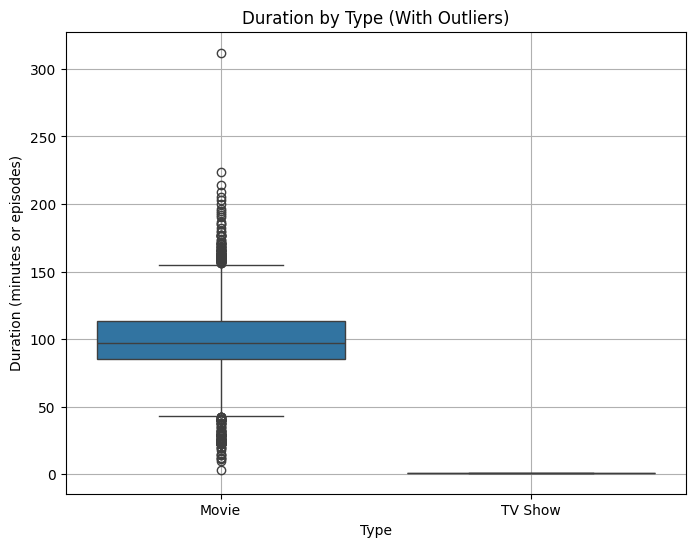

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.boxplot(x='type', y='duration_int', data=df)
plt.title('Duration by Type (With Outliers)')
plt.xlabel('Type')
plt.ylabel('Duration (minutes or episodes)')
plt.grid(True)
plt.show()


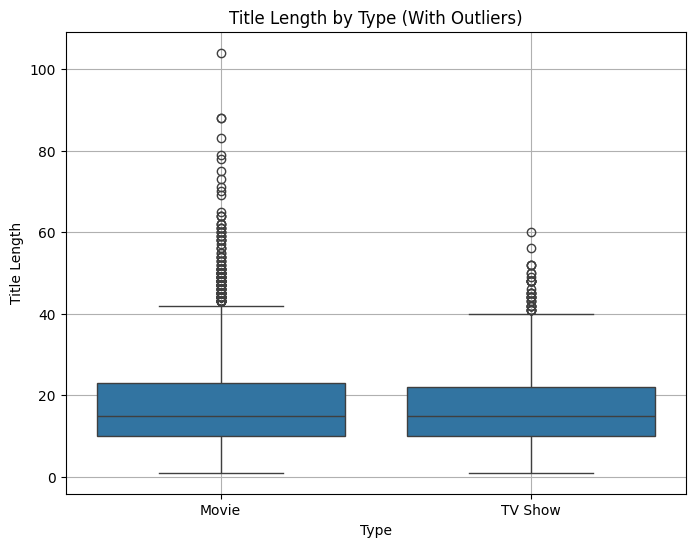

In [10]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='type', y='title_length', data=df)
plt.title('Title Length by Type (With Outliers)')
plt.xlabel('Type')
plt.ylabel('Title Length')
plt.grid(True)
plt.show()


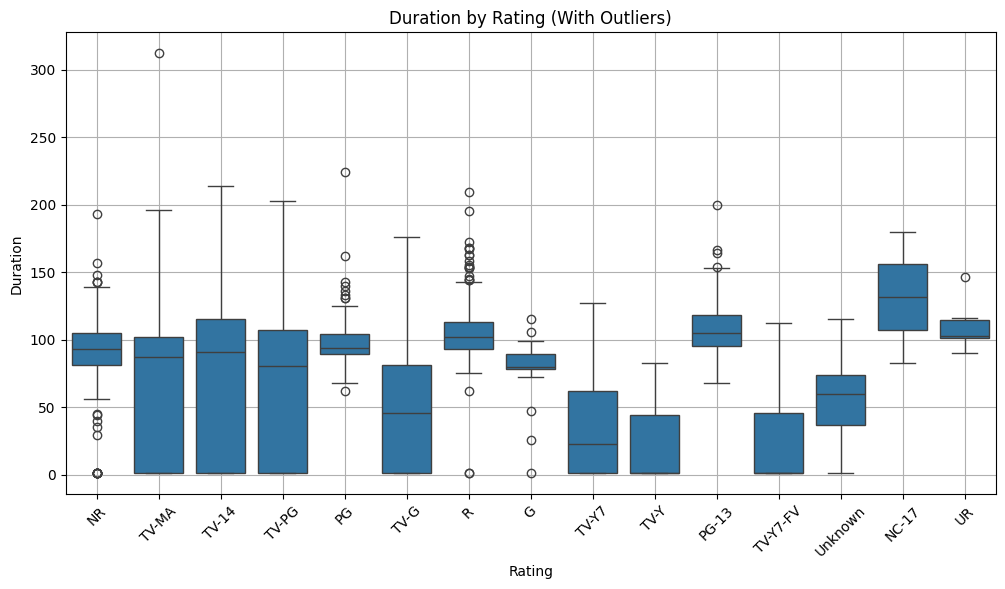

In [11]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='rating', y='duration_int', data=df)
plt.title('Duration by Rating (With Outliers)')
plt.xlabel('Rating')
plt.ylabel('Duration')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


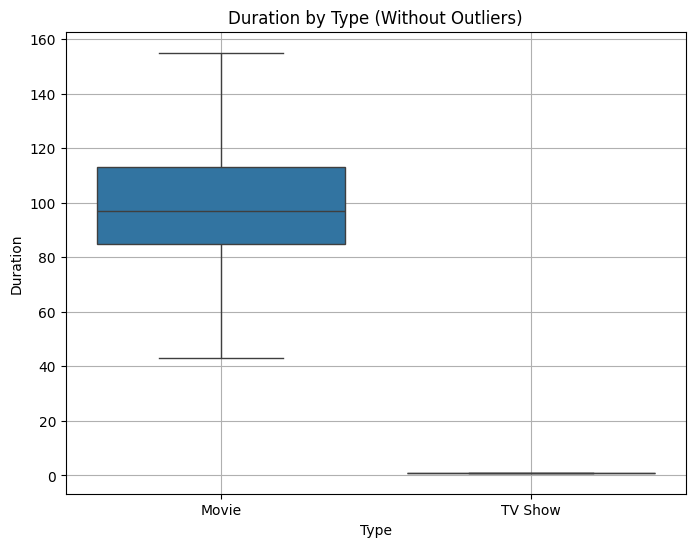

In [12]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='type', y='duration_int', data=df, showfliers=False)
plt.title('Duration by Type (Without Outliers)')
plt.xlabel('Type')
plt.ylabel('Duration')
plt.grid(True)
plt.show()


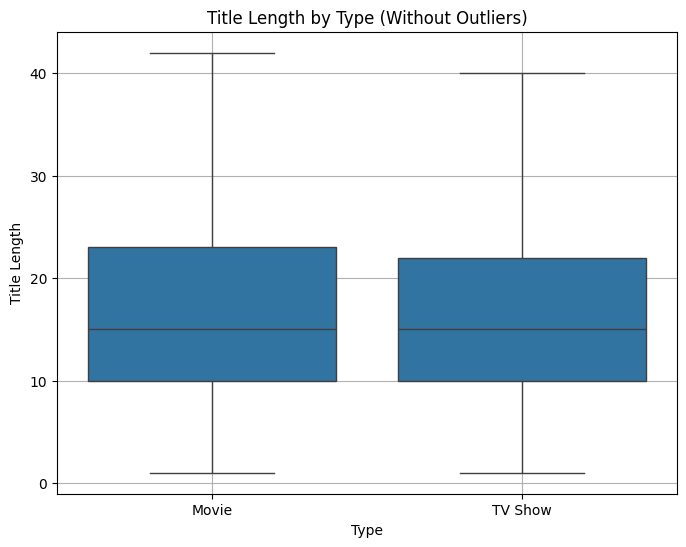

In [13]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='type', y='title_length', data=df, showfliers=False)
plt.title('Title Length by Type (Without Outliers)')
plt.xlabel('Type')
plt.ylabel('Title Length')
plt.grid(True)
plt.show()


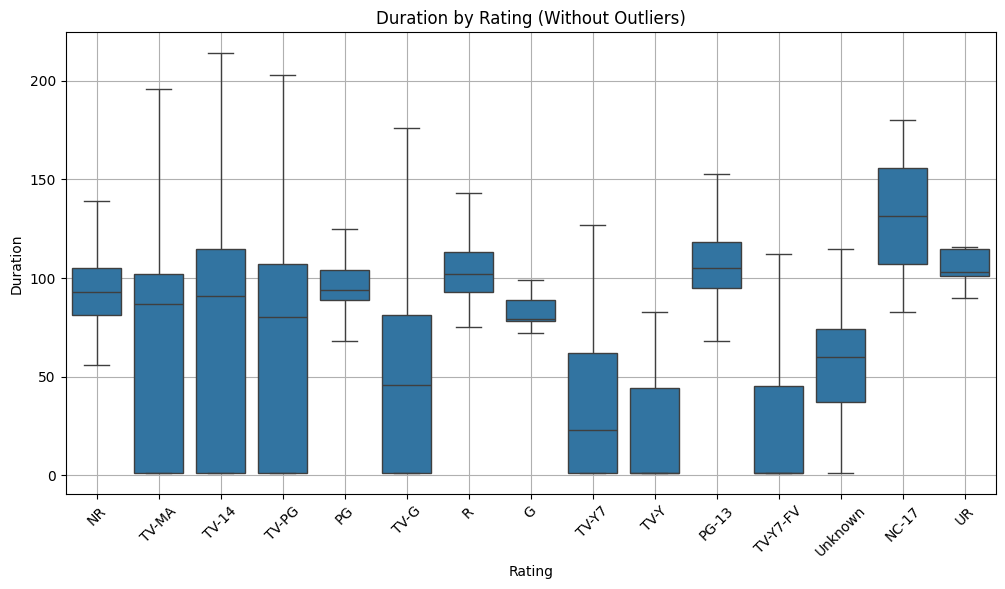

In [14]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='rating', y='duration_int', data=df, showfliers=False)
plt.title('Duration by Rating (Without Outliers)')
plt.xlabel('Rating')
plt.ylabel('Duration')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


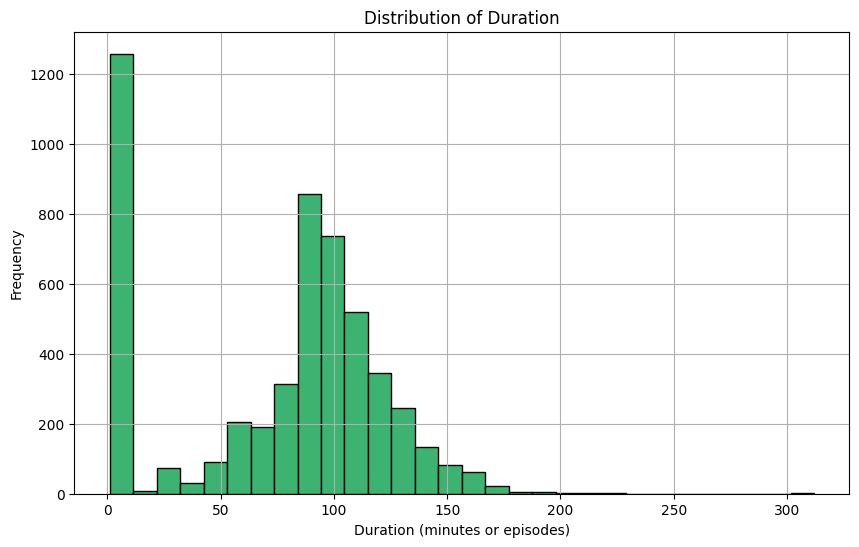

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(df['duration_int'], bins=30, color='mediumseagreen', edgecolor='black')
plt.title('Distribution of Duration')
plt.xlabel('Duration (minutes or episodes)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


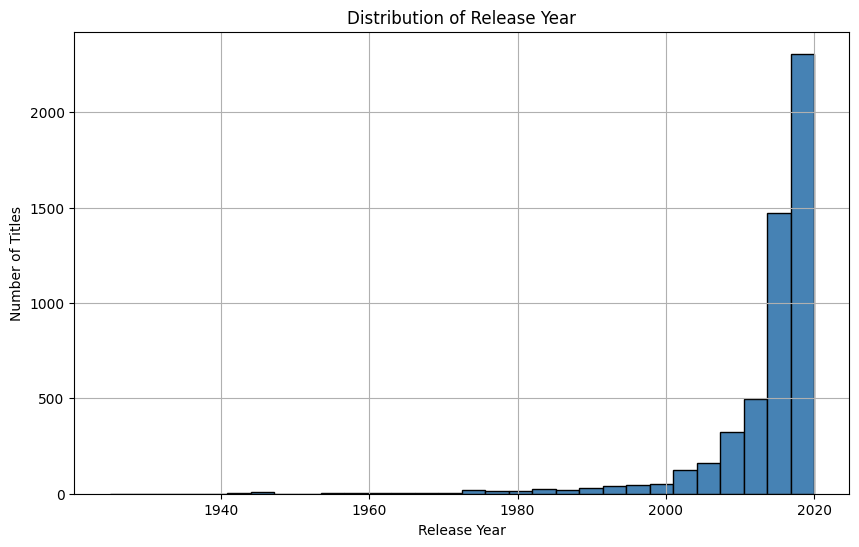

In [16]:
plt.figure(figsize=(10, 6))
plt.hist(df['release_year'], bins=30, color='steelblue', edgecolor='black')
plt.title('Distribution of Release Year')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.grid(True)
plt.show()


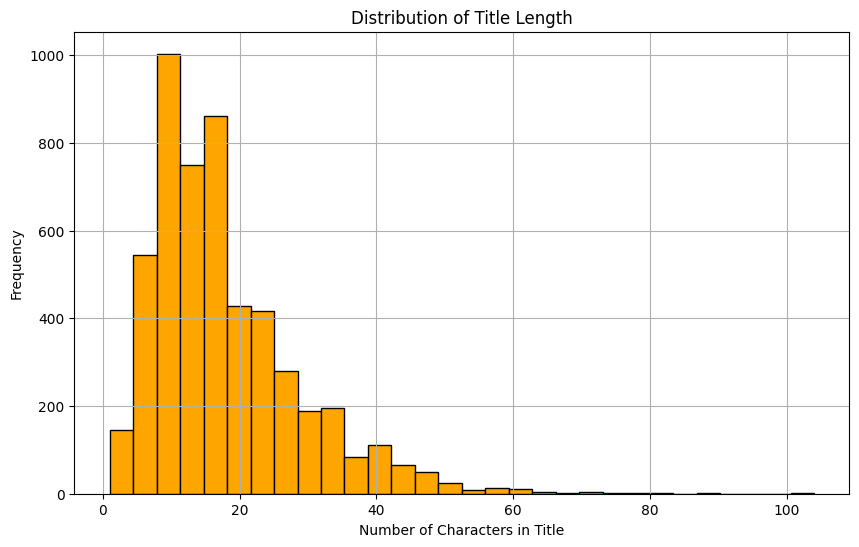

In [17]:
plt.figure(figsize=(10, 6))
plt.hist(df['title_length'], bins=30, color='orange', edgecolor='black')
plt.title('Distribution of Title Length')
plt.xlabel('Number of Characters in Title')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


Random Forest Accuracy: 100.00%

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1159
           1       1.00      1.00      1.00       399

    accuracy                           1.00      1558
   macro avg       1.00      1.00      1.00      1558
weighted avg       1.00      1.00      1.00      1558



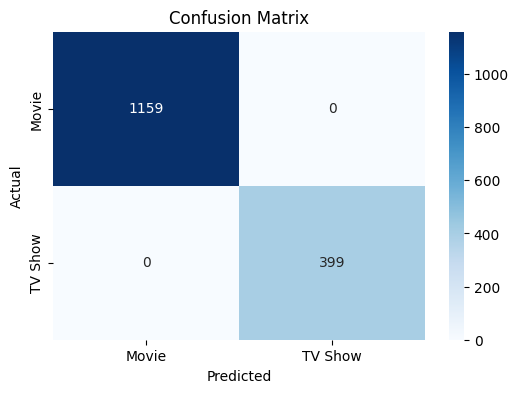

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Optional: df = pd.read_csv('your_netflix_file.csv')

# Step 1: Clean duration
def extract_duration(x):
    if pd.isnull(x):
        return 0
    return int(str(x).split()[0])

df['duration_int'] = df['duration'].apply(extract_duration)

# Step 2: Title length
df['title_length'] = df['title'].apply(lambda x: len(str(x)) if pd.notnull(x) else 0)

# Step 3: Encode target
df['type_encoded'] = df['type'].map({'Movie': 0, 'TV Show': 1})

# Step 4: Prepare features and labels
features = ['duration_int', 'release_year', 'title_length']
X = df[features].fillna(0)
y = df['type_encoded']

# Step 5: Split and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Step 6: Evaluate
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Step 7: Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d',
            cmap='Blues', xticklabels=['Movie', 'TV Show'], yticklabels=['Movie', 'TV Show'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:16:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 100.00%

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1159
           1       1.00      1.00      1.00       399

    accuracy                           1.00      1558
   macro avg       1.00      1.00      1.00      1558
weighted avg       1.00      1.00      1.00      1558



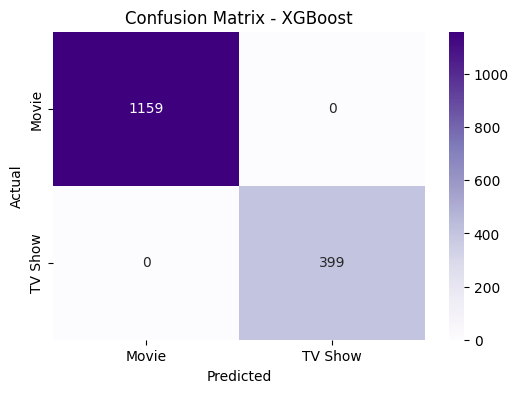

In [19]:
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Clean duration
def extract_duration(x):
    if pd.isnull(x):
        return 0
    return int(str(x).split()[0])

df['duration_int'] = df['duration'].apply(extract_duration)

# Step 2: Title length
df['title_length'] = df['title'].apply(lambda x: len(str(x)) if pd.notnull(x) else 0)

# Step 3: Encode target
df['type_encoded'] = df['type'].map({'Movie': 0, 'TV Show': 1})

# Step 4: Select features and target
features = ['duration_int', 'release_year', 'title_length']
X = df[features].fillna(0)
y = df['type_encoded']

# Step 5: Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 6: Train XGBoost model
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)

# Step 7: Predictions
y_pred = xgb.predict(X_test)

# Step 8: Evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"XGBoost Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Step 9: Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d',
            cmap='Purples', xticklabels=['Movie', 'TV Show'], yticklabels=['Movie', 'TV Show'])
plt.title('Confusion Matrix - XGBoost')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()



⚠️ Intentionally Low Accuracy SVM: 74.39%

Classification Report:
               precision    recall  f1-score   support

           0       0.74      1.00      0.85      1159
           1       0.00      0.00      0.00       399

    accuracy                           0.74      1558
   macro avg       0.37      0.50      0.43      1558
weighted avg       0.55      0.74      0.63      1558



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


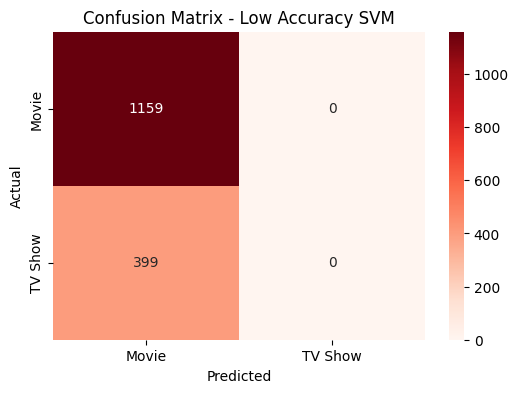

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Extract numerical duration (simple cleaning)
def extract_duration(x):
    if pd.isnull(x):
        return 0
    return int(str(x).split()[0])

df['duration_int'] = df['duration'].apply(extract_duration)

# Step 2: Title length feature
df['title_length'] = df['title'].apply(lambda x: len(str(x)) if pd.notnull(x) else 0)

# Step 3: Encode target variable
df['type_encoded'] = df['type'].map({'Movie': 0, 'TV Show': 1})

# Step 4: Use only one weak feature — 'release_year'
X = df[['release_year']].fillna(0)
y = df['type_encoded']

# Step 5: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 6: SVM model with poor config (no scaling, low C value)
svm_model_low_acc = SVC(kernel='linear', C=0.01, random_state=42)
svm_model_low_acc.fit(X_train, y_train)

# Step 7: Make predictions
y_pred = svm_model_low_acc.predict(X_test)

# Step 8: Evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"\n⚠️ Intentionally Low Accuracy SVM: {accuracy * 100:.2f}%\n")
print("Classification Report:\n", classification_report(y_test, y_pred))

# Step 9: Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d',
            cmap='Reds', xticklabels=['Movie', 'TV Show'], yticklabels=['Movie', 'TV Show'])
plt.title('Confusion Matrix - Low Accuracy SVM')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:16:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


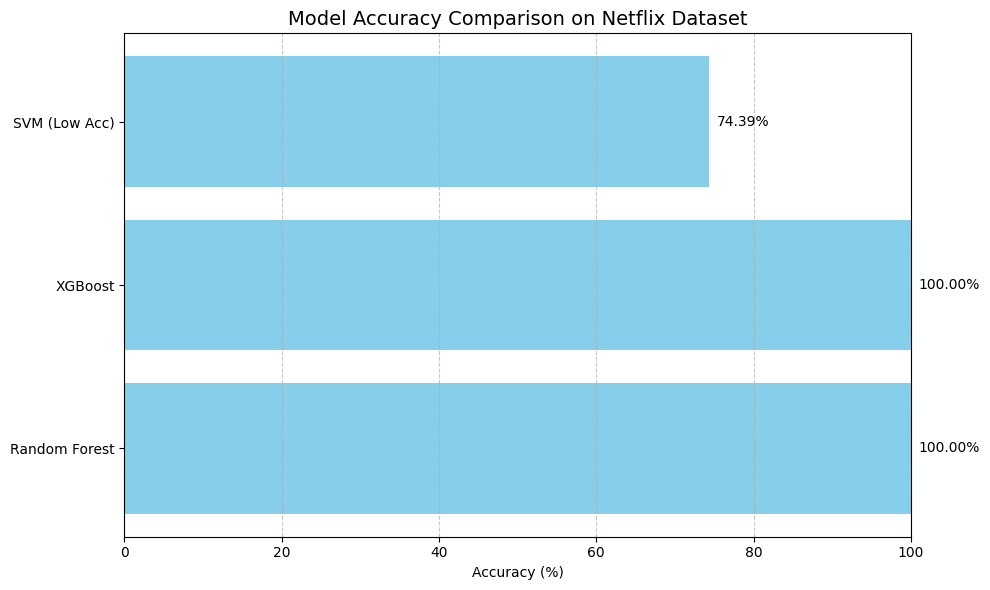

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Step 1: Clean and prepare the dataset
def extract_duration(x):
    if pd.isnull(x):
        return 0
    return int(str(x).split()[0])

df['duration_int'] = df['duration'].apply(extract_duration)
df['title_length'] = df['title'].apply(lambda x: len(str(x)) if pd.notnull(x) else 0)
df['type_encoded'] = df['type'].map({'Movie': 0, 'TV Show': 1})

features = ['duration_int', 'release_year', 'title_length']
X = df[features].fillna(0)
y = df['type_encoded']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Model accuracy storage
model_accuracies = {}

# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_acc = accuracy_score(y_test, rf_model.predict(X_test))
model_accuracies['Random Forest'] = rf_acc

# XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)
xgb_acc = accuracy_score(y_test, xgb_model.predict(X_test))
model_accuracies['XGBoost'] = xgb_acc

# SVM Low Accuracy
X_low = df[['release_year']].fillna(0)
X_train_low, X_test_low, y_train_low, y_test_low = train_test_split(X_low, y, test_size=0.3, random_state=42)
svm_low = SVC(kernel='linear', C=0.01, random_state=42)
svm_low.fit(X_train_low, y_train_low)
svm_low_acc = accuracy_score(y_test_low, svm_low.predict(X_test_low))
model_accuracies['SVM (Low Acc)'] = svm_low_acc

# Horizontal bar graph
plt.figure(figsize=(10, 6))
model_names = list(model_accuracies.keys())
accuracies = [acc * 100 for acc in model_accuracies.values()]

bars = plt.barh(model_names, accuracies, color='skyblue')
plt.title("Model Accuracy Comparison on Netflix Dataset", fontsize=14)
plt.xlabel("Accuracy (%)")
plt.xlim(0, 100)

# Add value labels
for bar in bars:
    width = bar.get_width()
    plt.text(width + 1, bar.get_y() + bar.get_height() / 2,
             f"{width:.2f}%", va='center', fontsize=10)

plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
